<a href="https://colab.research.google.com/github/gattaDeepak/EDA/blob/main/21BDS0301_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21BDS0301 GATTA JAYA MANI DEEPAK

In [42]:
# Github Link - https://github.com/gattaDeepak/EDA/blob/main/21BDS0301_EDA.ipynb
# Colab Link - https://colab.research.google.com/drive/1xPOxWqvHNIg-CA3ZfJUIPeUPAqKh2Nz8#scrollTo=tbjSJScNtIhC

DIGITAL ASSIGNMENT 1

EXPLORATORY DATA ANALYSIS

SLOT - D1

MODULE 1 - Introduction to Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [2]:
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
df = pd.read_csv(file_path)

Saving happiness.csv to happiness.csv


In [3]:
# Steps in EDA
print("Step 1: Understanding Data Structure")
display(df.head())
df.info()

print("Step 2: Checking for Missing Values")
print(df.isnull().sum())

print("Step 3: Summary Statistics")
print(df.describe())

# Data Types - Numerical (Discrete and Continuous) and Categorical
discrete_cols = ['vhappy', 'black', 'female', 'blackfemale']
continuous_cols = ['prestige', 'educ', 'babies', 'preteen', 'teens', 'tvhours']
categorical_cols = ['workstat', 'divorce', 'widowed', 'region', 'happy']


Step 1: Understanding Data Structure


,rownames,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,...,occattend,regattend,y94,y96,y98,y00,y02,y04,y06,unem10
0,1,1994,keeping house,46.0,NaN,iap,12.0,middle atlantic,2.0,3.0,...,1.0,0.0,1,0,0,0,0,0,0,1.0
1,2,1994,working fulltime,22.0,no,iap,12.0,foreign,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0
2,3,1994,working fulltime,29.0,no,iap,12.0,foreign,0.0,0.0,...,0.0,1.0,1,0,0,0,0,0,0,NaN
3,4,1994,working fulltime,42.0,yes,iap,8.0,foreign,0.0,0.0,...,0.0,0.0,1,0,0,0,0,0,0,1.0
4,5,1994,working parttime,36.0,NaN,NaN,13.0,middle atlantic,0.0,1.0,...,0.0,0.0,1,0,0,0,0,0,0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17137 entries, 0 to 17136
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rownames     17137 non-null  int64  
 1   year         17137 non-null  int64  
 2   workstat     17134 non-null  object 
 3   prestige     16283 non-null  float64
 4   divorce      9754 non-null   object 
 5   widowed      11096 non-null  object 
 6   educ         17093 non-null  float64
 7   reg16        17137 non-null  object 
 8   babies       17036 non-null  float64
 9   preteen      17036 non-null  float64
 10  teens        17049 non-null  float64
 11  income       15045 non-null  object 
 12  region       17137 non-null  object 
 13  attend       16864 non-null  object 
 14  happy        17137 non-null  object 
 15  owngun       11297 non-null  object 
 16  tvhours      11794 non-null  float64
 17  vhappy       17137 non-null  int64  
 18  mothfath16   17132 non-null  float64
 19  blac

MODULE 2: Data Transformation

In [4]:
# Deduplication - Removing duplicate rows
df = df.drop_duplicates()

In [5]:
# Replacing Values - Handling incorrect values
df['happy'] = df['happy'].replace({'very happy': 'vhappy', 'not happy': 'unhappy'})

In [6]:
# Discretization and Binning
df['educ_bins'] = pd.cut(df['educ'], bins=4, labels=['Low', 'Medium', 'High', 'Very High'])

In [7]:
# Handling Missing Data - Traditional Methods and Maximum Likelihood Estimation
# Filling missing numerical values with median
df[continuous_cols] = df[continuous_cols].apply(lambda x: x.fillna(x.median()))

In [8]:
# Filling missing categorical values with mode
df[continuous_cols] = df[continuous_cols].apply(lambda x: x.fillna(x.median()))
print("Dataset after Data Transformation - ")
df.head()

Dataset after Data Transformation - 


,rownames,year,workstat,prestige,divorce,widowed,educ,reg16,babies,preteen,...,regattend,y94,y96,y98,y00,y02,y04,y06,unem10,educ_bins
0,1,1994,keeping house,46.0,NaN,iap,12.0,middle atlantic,2.0,3.0,...,0.0,1,0,0,0,0,0,0,1.0,High
1,2,1994,working fulltime,22.0,no,iap,12.0,foreign,0.0,0.0,...,0.0,1,0,0,0,0,0,0,0.0,High
2,3,1994,working fulltime,29.0,no,iap,12.0,foreign,0.0,0.0,...,1.0,1,0,0,0,0,0,0,NaN,High
3,4,1994,working fulltime,42.0,yes,iap,8.0,foreign,0.0,0.0,...,0.0,1,0,0,0,0,0,0,1.0,Medium
4,5,1994,working parttime,36.0,NaN,NaN,13.0,middle atlantic,0.0,1.0,...,0.0,1,0,0,0,0,0,0,0.0,High


MODULE 3: Correlation Analysis and Time Series Analysis

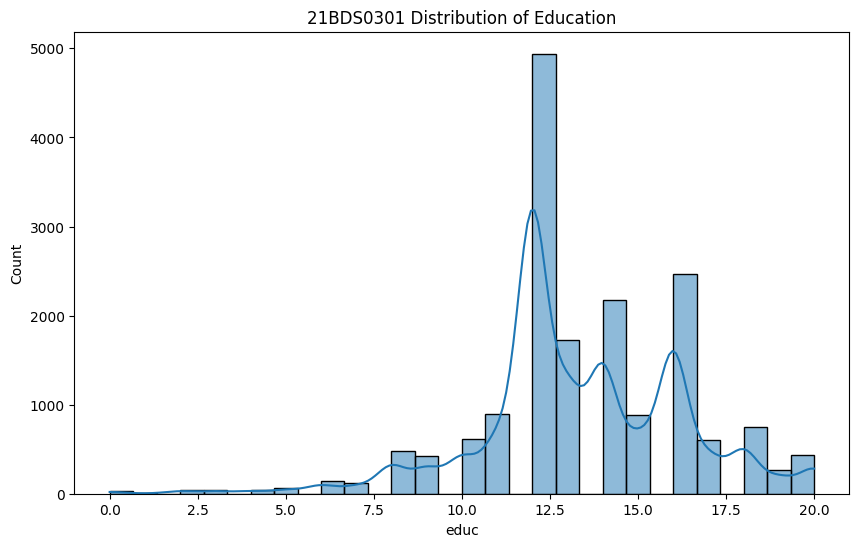

In [9]:
# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['educ'], kde=True, bins=30)
plt.title('21BDS0301 Distribution of Education')
plt.show()

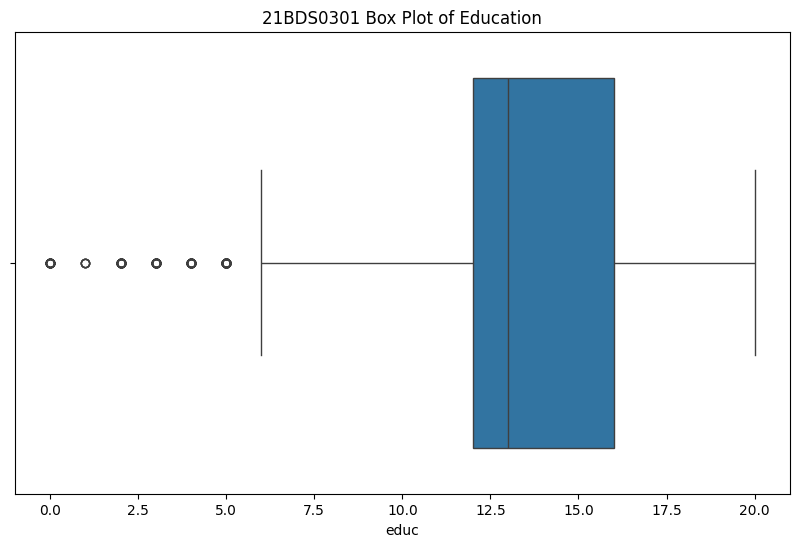

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['educ'])
plt.title('21BDS0301 Box Plot of Education')
plt.show()

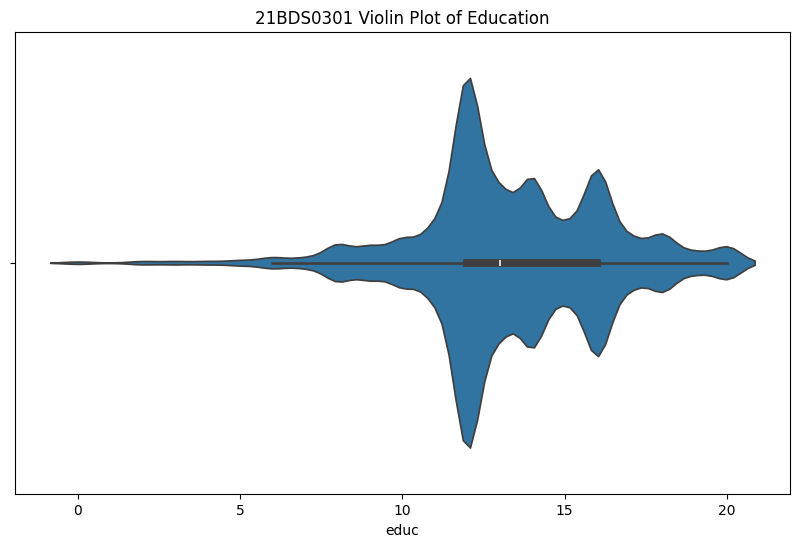

In [11]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['educ'])
plt.title('21BDS0301 Violin Plot of Education')
plt.show()

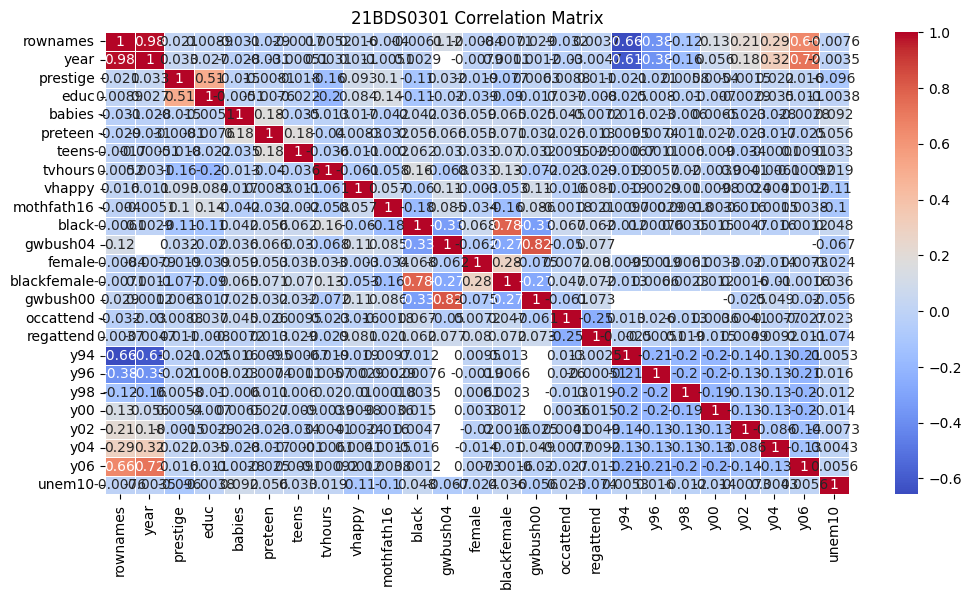

In [12]:
# Bivariate Analysis - Correlation Heatmap
# Bivariate Analysis - Correlation Heatmap
plt.figure(figsize=(12, 6))
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("21BDS0301 Correlation Matrix")
plt.show()

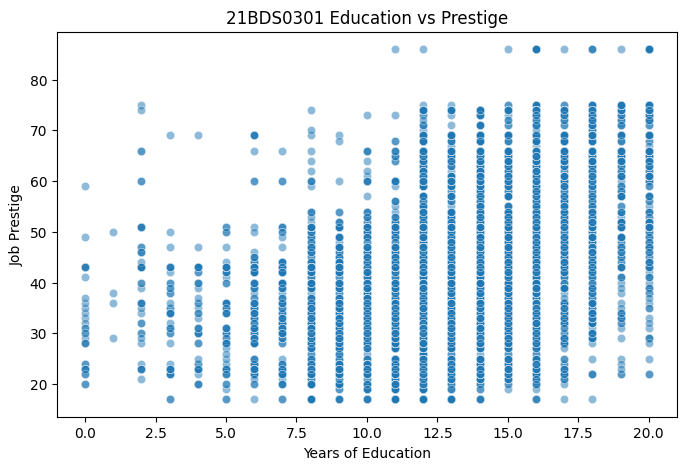

In [13]:
# Bivariate Analysis - Scatterplot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='educ', y='prestige', alpha=0.5)
plt.title("21BDS0301 Education vs Prestige")
plt.xlabel("Years of Education")
plt.ylabel("Job Prestige")
plt.show()

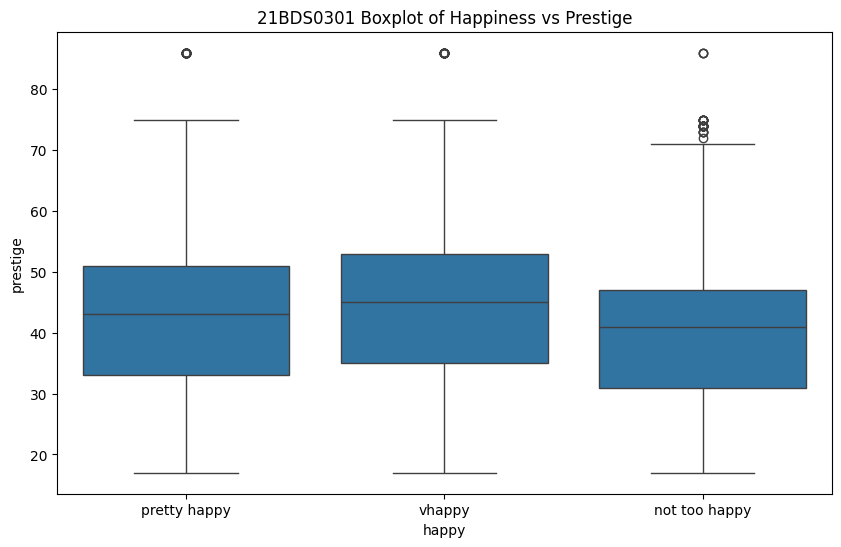

In [14]:
# Bivariate Analysis - Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['happy'], y=df['prestige'])
plt.title('21BDS0301 Boxplot of Happiness vs Prestige')
plt.show()

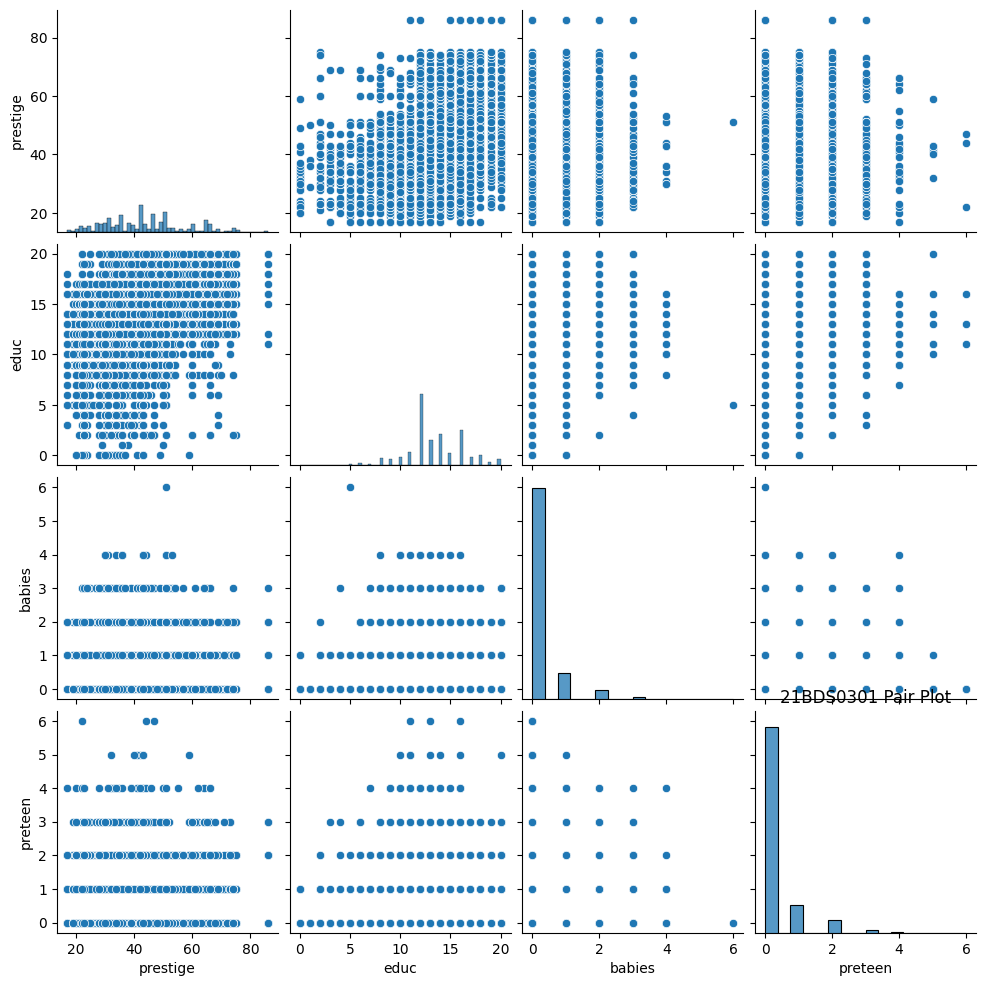

In [15]:
# Multivariate Analysis - Pairplot
sns.pairplot(df[continuous_cols[:4]])
plt.title("21BDS0301 Pair Plot")
plt.show()

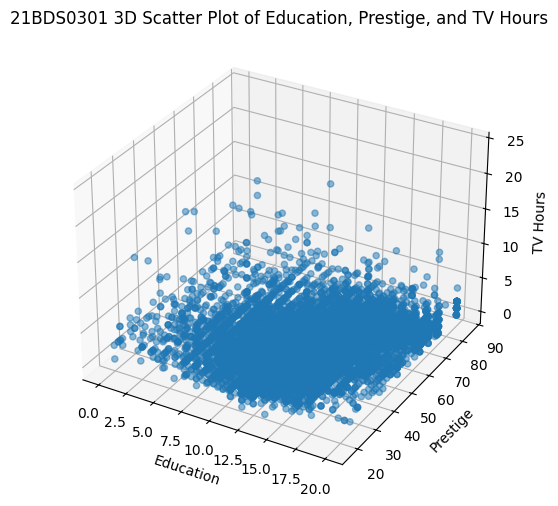

In [16]:
# Multivariate Analysis - 3D Scatterplot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['educ'], df['prestige'], df['tvhours'], alpha=0.5)
ax.set_xlabel("Education")
ax.set_ylabel("Prestige")
ax.set_zlabel("TV Hours")
plt.title("21BDS0301 3D Scatter Plot of Education, Prestige, and TV Hours")
plt.show()

 MODULE 4 and 5 - *CLUSTERING*

K MEANS CLUSTERING


--- K-MEANS CLUSTERING ---


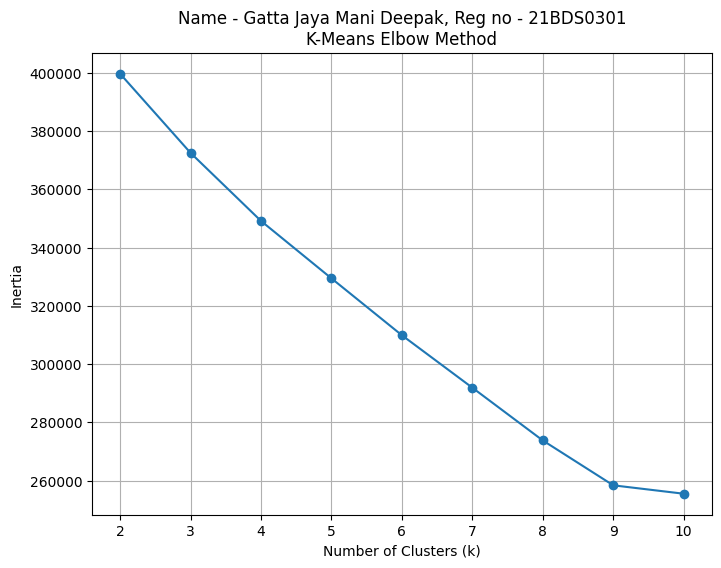


K-Means Clusters:
KMeans_Cluster
2    7899
1    7703
0    1535
Name: count, dtype: int64


In [28]:
# --- K-MEANS CLUSTERING ALGORITHM ---
print("\n--- K-MEANS CLUSTERING ---")
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


# Elbow Method Plot
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Name - Gatta Jaya Mani Deepak, Reg no - 21BDS0301\nK-Means Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Apply K-Means with an optimal k (e.g., based on elbow method or silhouette score)
optimal_k_kmeans = 3 # You might need to adjust this based on the plots
kmeans_optimal = KMeans(n_clusters=optimal_k_kmeans, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans_optimal.fit_predict(X_scaled)
print(f"\nK-Means Clusters:\n{df['KMeans_Cluster'].value_counts()}")

SPECTRAL CLUSTERING USING MST

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


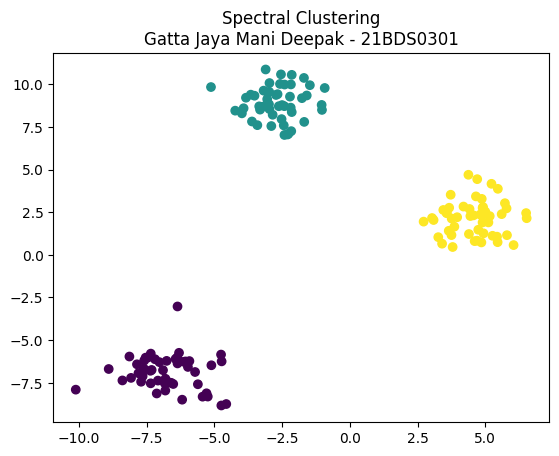


Document Clustering:
Cluster 0: Machine learning is fun.
Cluster 0: Deep learning is a branch of machine learning.
Cluster 1: Clustering algorithms group data.
Cluster 1: Unsupervised learning includes clustering.
Cluster 1: Data science includes statistics and machine learning.


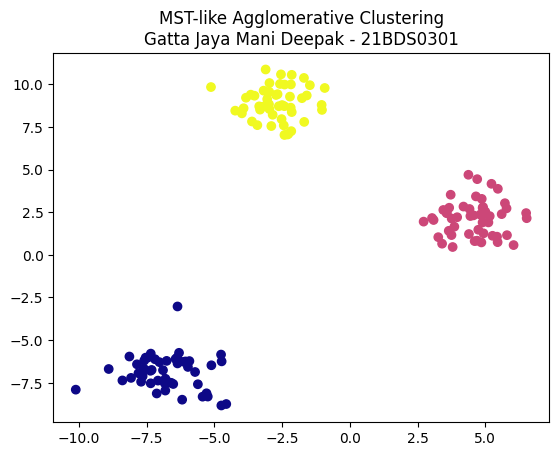

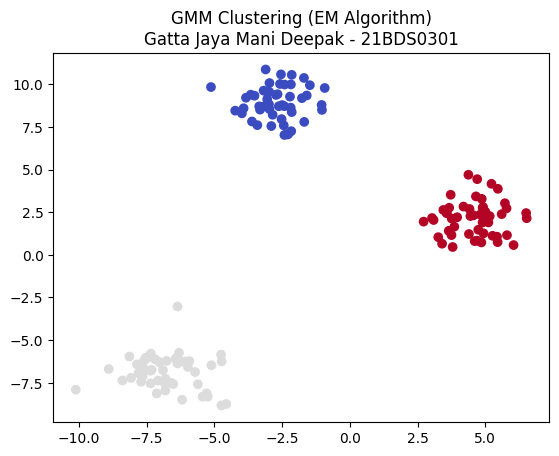

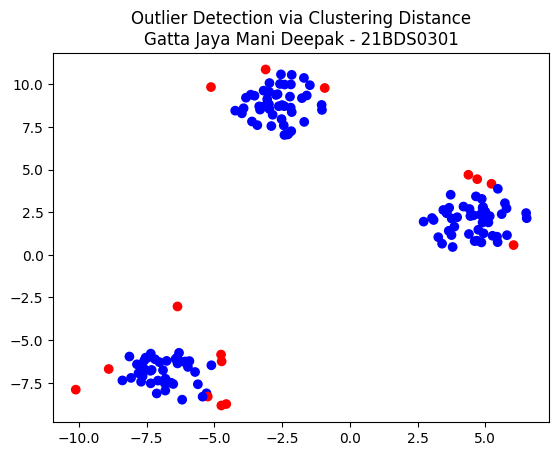

In [38]:
import numpy as np
from sklearn.cluster import SpectralClustering, KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from scipy.sparse.csgraph import minimum_spanning_tree
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns

# Synthetic Data for Demonstration (3 features)
X, _ = make_blobs(n_samples=150, centers=3, random_state=42)

# --- Spectral Clustering ---
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels_spectral = spectral.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels_spectral, cmap='viridis')
plt.title("Spectral Clustering\nGatta Jaya Mani Deepak - 21BDS0301")
plt.show()

# --- Document Clustering using TF-IDF (Simulated Documents) ---
documents = [
    "Machine learning is fun.",
    "Deep learning is a branch of machine learning.",
    "Clustering algorithms group data.",
    "Unsupervised learning includes clustering.",
    "Data science includes statistics and machine learning."
]

vectorizer = TfidfVectorizer()
X_docs = vectorizer.fit_transform(documents)

kmeans = KMeans(n_clusters=2, random_state=42)
doc_labels = kmeans.fit_predict(X_docs)

print("\nDocument Clustering:")
for idx, label in enumerate(doc_labels):
    print(f"Cluster {label}: {documents[idx]}")

# --- Minimum Spanning Tree Clustering (Using Hierarchical Clustering) ---
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')
labels_agg = agg.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=labels_agg, cmap='plasma')
plt.title("MST-like Agglomerative Clustering\nGatta Jaya Mani Deepak - 21BDS0301")
plt.show()

# --- Expectation-Maximization (Gaussian Mixture Model) ---
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X)

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='coolwarm')
plt.title("GMM Clustering (EM Algorithm)\nGatta Jaya Mani Deepak - 21BDS0301")
plt.show()

# --- Outlier Detection using Clustering ---
# Outliers are those far from cluster centers
distances = np.min(pairwise_distances(X, gmm.means_), axis=1)
threshold = np.percentile(distances, 90)
outliers = distances > threshold

plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=outliers, cmap='bwr')
plt.title("Outlier Detection via Clustering Distance\nGatta Jaya Mani Deepak - 21BDS0301")
plt.show()


MODULE - 6 DIMENSIONALITY REDUCTION

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=9940a30fa3ee02347b16435b880b66b5a76bcab740a8371c467ba20abf568fec
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


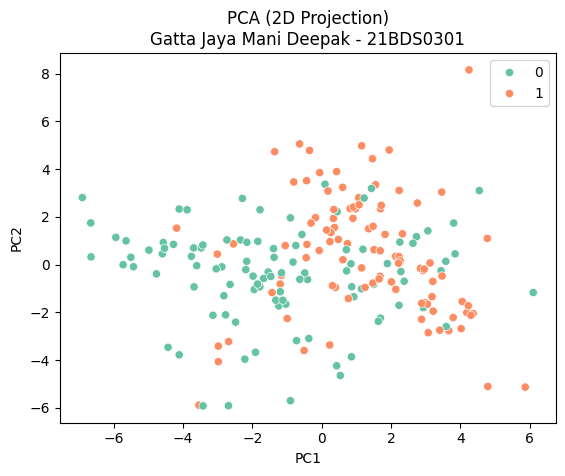

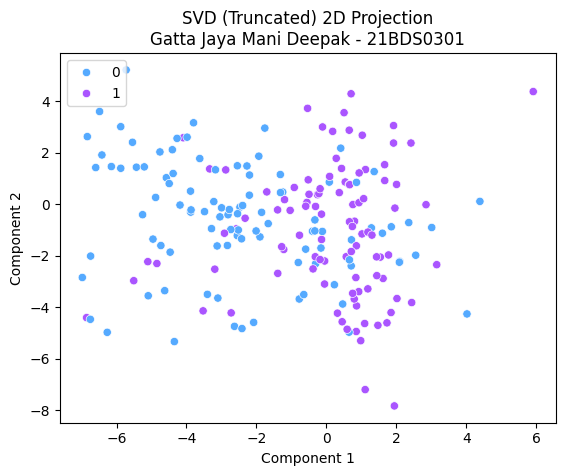

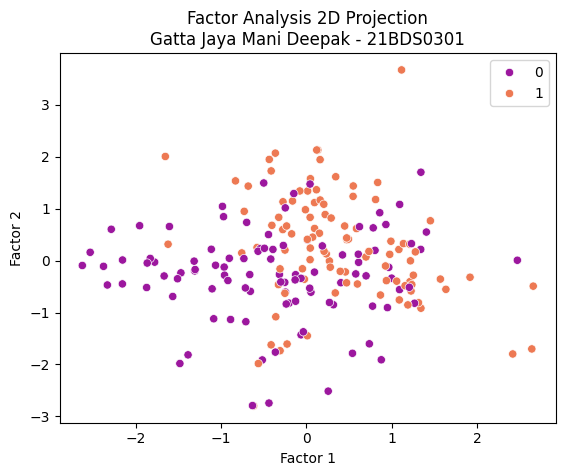

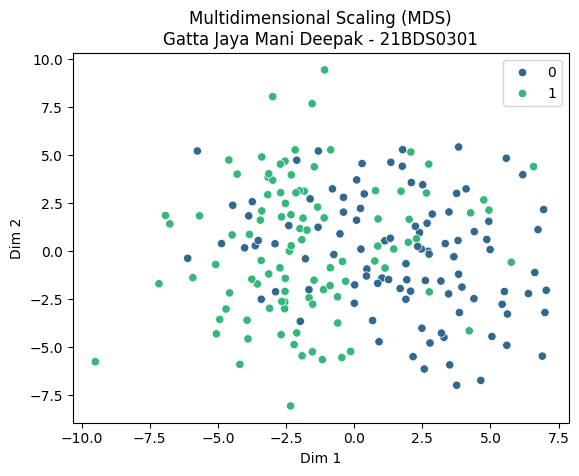

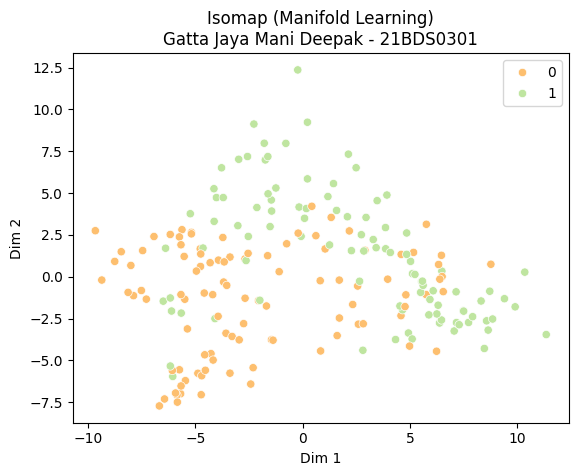

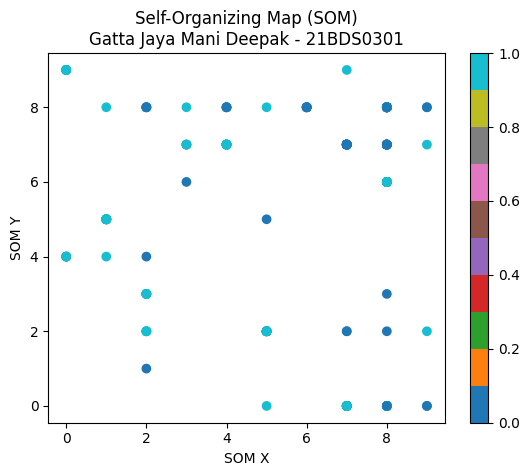

In [39]:
import numpy as np
from sklearn.decomposition import PCA, TruncatedSVD, FactorAnalysis
from sklearn.manifold import MDS, Isomap
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

# For SOM
!pip install minisom
from minisom import MiniSom

# Generate synthetic high-dimensional data
X, y = make_classification(n_samples=200, n_features=10, n_informative=5, n_redundant=2, random_state=42)

# --- Principal Component Analysis (PCA) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure()
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set2')
plt.title("PCA (2D Projection)\nGatta Jaya Mani Deepak - 21BDS0301")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# --- Singular Value Decomposition (SVD) ---
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

plt.figure()
sns.scatterplot(x=X_svd[:, 0], y=X_svd[:, 1], hue=y, palette='cool')
plt.title("SVD (Truncated) 2D Projection\nGatta Jaya Mani Deepak - 21BDS0301")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

# --- Factor Analysis ---
fa = FactorAnalysis(n_components=2)
X_fa = fa.fit_transform(X)

plt.figure()
sns.scatterplot(x=X_fa[:, 0], y=X_fa[:, 1], hue=y, palette='plasma')
plt.title("Factor Analysis 2D Projection\nGatta Jaya Mani Deepak - 21BDS0301")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")
plt.show()

# --- Multidimensional Scaling (MDS) ---
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

plt.figure()
sns.scatterplot(x=X_mds[:, 0], y=X_mds[:, 1], hue=y, palette='viridis')
plt.title("Multidimensional Scaling (MDS)\nGatta Jaya Mani Deepak - 21BDS0301")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

# --- Manifold Learning: Isomap ---
isomap = Isomap(n_components=2)
X_iso = isomap.fit_transform(X)

plt.figure()
sns.scatterplot(x=X_iso[:, 0], y=X_iso[:, 1], hue=y, palette='Spectral')
plt.title("Isomap (Manifold Learning)\nGatta Jaya Mani Deepak - 21BDS0301")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.show()

# --- Self-Organizing Maps (SOM) ---
som = MiniSom(x=10, y=10, input_len=X.shape[1], sigma=0.5, learning_rate=0.5, random_seed=42)
som.train(X, 100)

# Map to 2D grid
mapped = np.array([som.winner(xi) for xi in X])
plt.figure()
plt.scatter(mapped[:, 0], mapped[:, 1], c=y, cmap='tab10')
plt.title("Self-Organizing Map (SOM)\nGatta Jaya Mani Deepak - 21BDS0301")
plt.xlabel("SOM X")
plt.ylabel("SOM Y")
plt.colorbar()
plt.show()


MODULE 7 - LINEAR REGRESSION

Mean Squared Error: 140.13
R² Score: 0.28


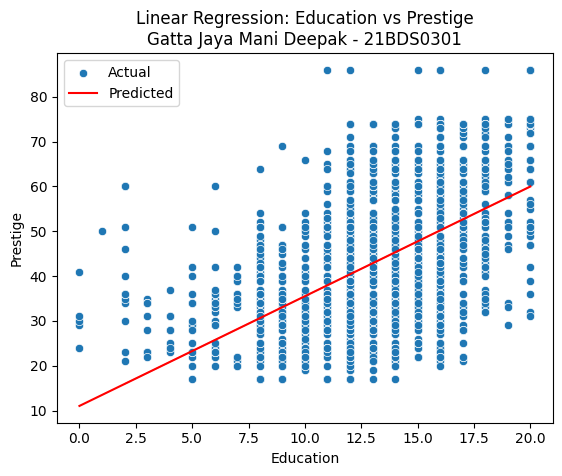

In [40]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv("happiness.csv")

# Drop NA values for modeling
df_model = df[['educ', 'prestige']].dropna()

# --- Constructing Linear Regression Model ---
X = df_model[['educ']]        # Feature
y = df_model['prestige']      # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# --- Evaluation ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

# --- Visualize Regression Line ---
plt.figure()
sns.scatterplot(x=X_test['educ'], y=y_test, label="Actual")
sns.lineplot(x=X_test['educ'], y=y_pred, color='red', label="Predicted")
plt.title("Linear Regression: Education vs Prestige\nGatta Jaya Mani Deepak - 21BDS0301")
plt.xlabel("Education")
plt.ylabel("Prestige")
plt.legend()
plt.show()